### Importar módulos que necesitaremos para este portátil

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar el conjunto de datos de entrenamiento

In [2]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


### Características y etiquetas separadas
### Después de separar el conjunto de datos, ahora tenemos matrices entumecidas llamadas **X** que contienen las características y **y** que contienen las etiquetas.

In [3]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

### Dividir los datos 70%-30% en conjunto de entrenamiento y conjunto de prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


### Encaja un modelo de lazo en el set de entrenamiento

In [5]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print (model, "\n")

Lasso() 



### Evaluar el modelo utilizando los datos de prueba

In [6]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

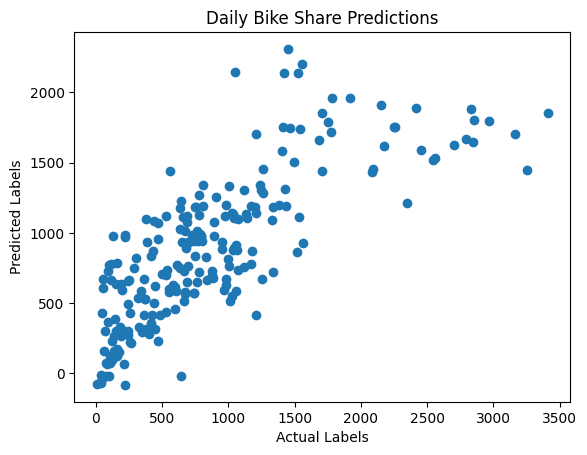

In [7]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### superponer la línea de regresión

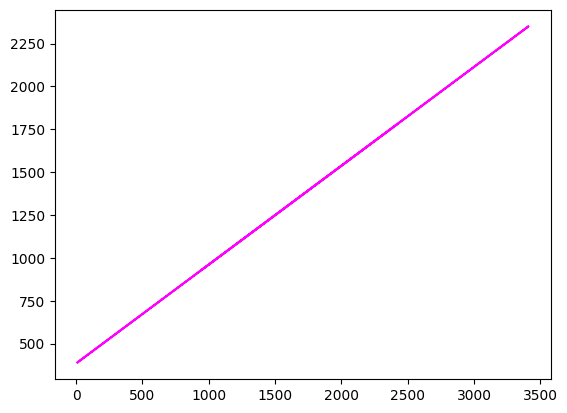

In [8]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Entrenar el modelo

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")


DecisionTreeRegressor() 



### Visualizar el árbol del modelo

In [10]:
tree = export_text(model)
print(tree)

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_6 <= 0.30
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_6 >  0.30
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |

### Evaluar el modelo utilizando los datos de prueba

In [11]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 250406.77272727274
RMSE: 500.40660739769686
R2: 0.5090932385093876


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

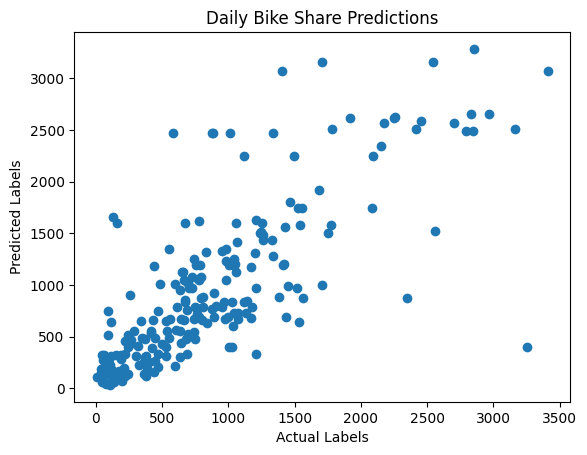

In [12]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### superponer la línea de regresión

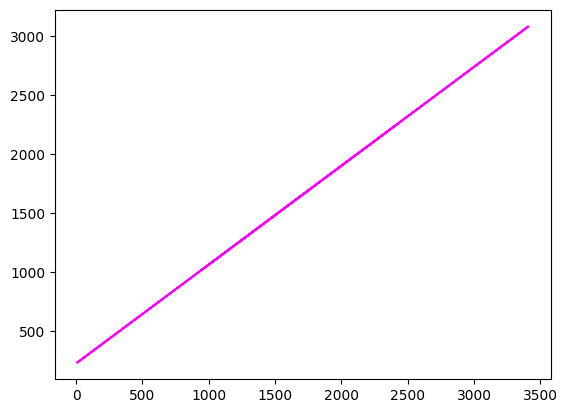

In [13]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Entrenar el modelo

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

RandomForestRegressor() 




### Evaluar el modelo utilizando los datos de prueba

In [15]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 110526.73969727271
RMSE: 332.45562064322615
R2: 0.7833192638842927


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

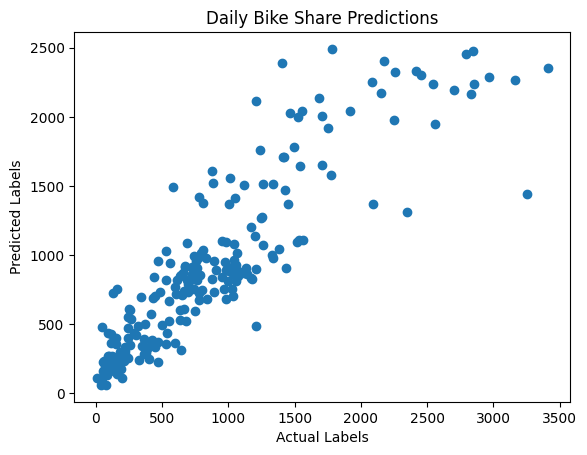

In [16]:

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')


### superponer la línea de regresión

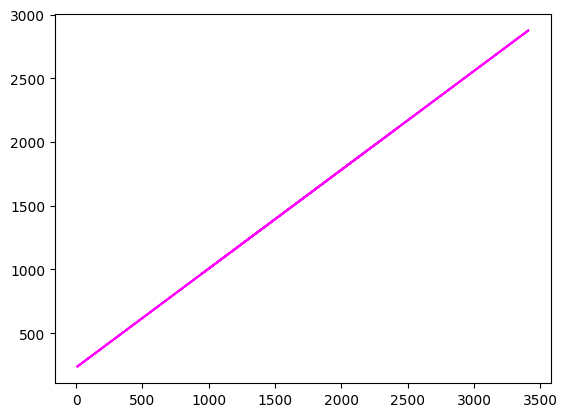

In [17]:

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Entrenar el modelo

In [18]:

from sklearn.ensemble import GradientBoostingRegressor

### Encajar un modelo de lazo en el set de entrenamiento

In [19]:
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

GradientBoostingRegressor() 



### Evaluar el modelo utilizando los datos de prueba

In [20]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 104261.13614145694
RMSE: 322.8949304982302
R2: 0.7956025864033669


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

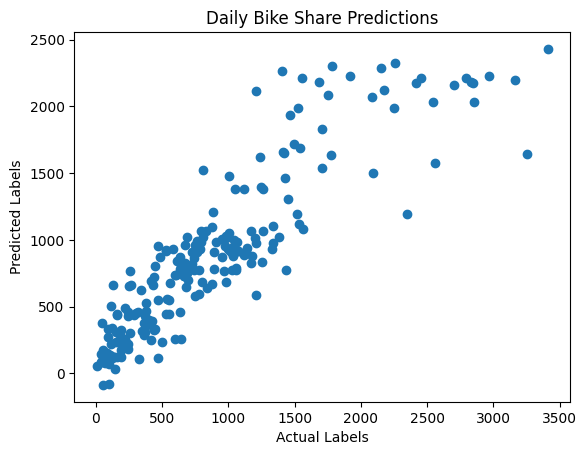

In [21]:

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')


### superponer la línea de regresión

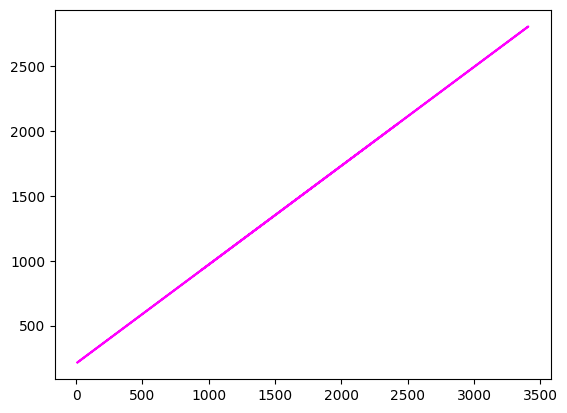

In [22]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Optimización y guardado de modelos

### Importar módulos que necesitaremos para este portátil

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar el conjunto de datos de entrenamiento

In [24]:

bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


### Características y etiquetas separadas
### Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las características y **y** que contienen las etiquetas.

In [25]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values


### Dividir los datos 70%-30% en conjunto de entrenamiento y conjunto de prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


### Entrenar el modelo

In [27]:

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### Encajar un modelo de lazo en el set de entrenamiento

In [28]:
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

GradientBoostingRegressor() 



### Evaluar el modelo utilizando los datos de prueba

In [29]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 103946.52787625133
RMSE: 322.4073942642311
R2: 0.7962193561613418


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

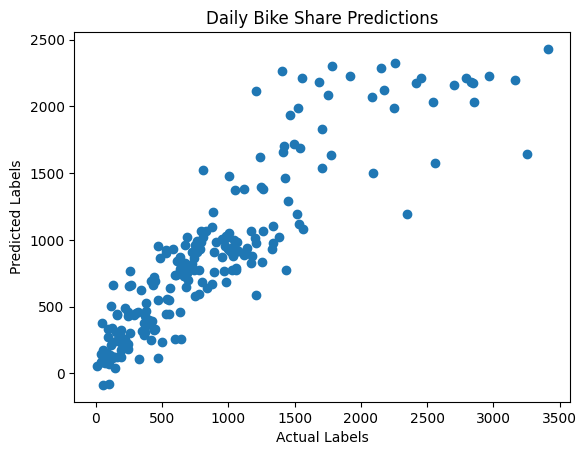

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### superponer la línea de regresión

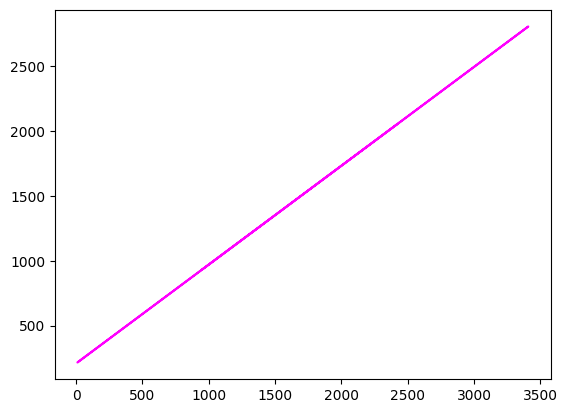

In [31]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Usar un algoritmo de aumento de gradiente

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
alg = GradientBoostingRegressor()

### Pruebe estos valores de hiperparámetros

In [33]:
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

### Encuentra la mejor combinación de hiperparámetros para optimizar la métrica R2

In [34]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 



### Consigue el mejor modelo

In [35]:
model=gridsearch.best_estimator_
print(model, "\n")

GradientBoostingRegressor() 



### Evaluar el modelo utilizando los datos de prueba

In [36]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 103866.65874109595
RMSE: 322.28350677795464
R2: 0.796375934587936


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

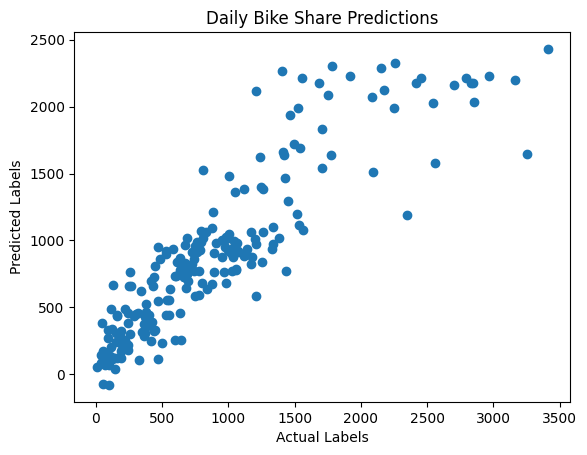

In [37]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### superponer la línea de regresión

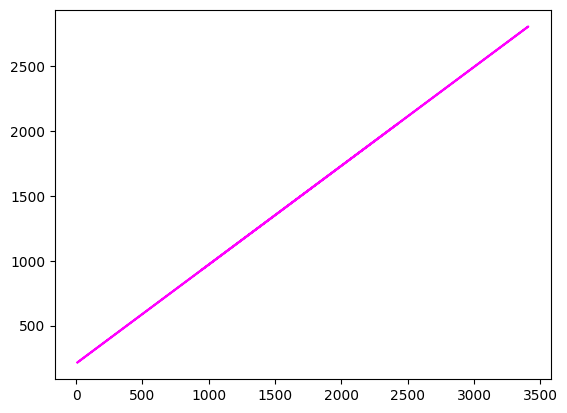

In [38]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

### Usar un algoritmo de aumento de gradiente

In [40]:
alg = GradientBoostingRegressor()

### Pruebe estos valores de hiperparámetros

In [41]:
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }


### Encuentra la mejor combinación de hiperparámetros para optimizar la métrica R2

In [42]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 



### Consigue el mejor modelo

In [43]:
model=gridsearch.best_estimator_
print(model, "\n")


GradientBoostingRegressor() 



### Evaluar el modelo utilizando los datos de prueba

In [44]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 103725.5896738671
RMSE: 322.06457376412436
R2: 0.7966524916402297


### Gráfico predicho vs real

Text(0.5, 1.0, 'Daily Bike Share Predictions')

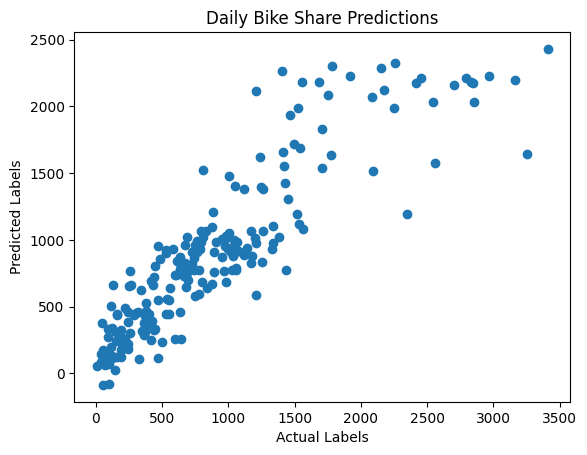

In [45]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### superponer la línea de regresión

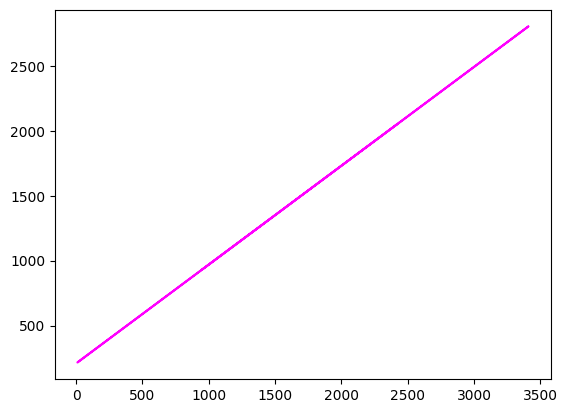

In [46]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Entrenar el modelo

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

### Definir el preprocesamiento de columnas numéricas (escalarlas)

In [48]:
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

### Definir el preprocesamiento de características categóricas (codificarlas)

In [49]:
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Combinar pasos de preprocesamiento

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Crear canalización de preprocesamiento y capacitación

In [51]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

### Ajustar la canalización para entrenar un modelo de regresión lineal en el conjunto de entrenamiento

In [52]:
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


### Obtener predicciones

In [53]:
predictions = model.predict(X_test)

### Mostrar métricas

In [54]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 105202.7483706462
RMSE: 324.349731571719
R2: 0.7937566147270548


### Gráfico predicho vs real

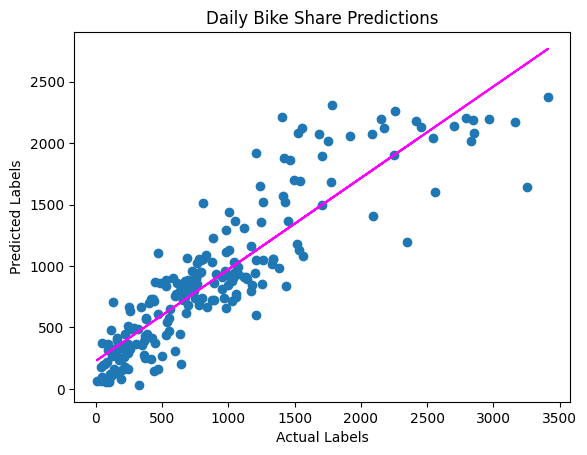

In [55]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Usar un estimador diferente en la canalización

In [56]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

### Ajustar la canalización para entrenar un modelo de regresión lineal en el conjunto de entrenamiento

In [57]:
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



### obtener prediciciones

In [58]:
predictions = model.predict(X_test)

### Mostrar métricas

In [59]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 102796.44418045455
RMSE: 320.6188456414478
R2: 0.7984740230635092


### Gráfico predicho vs real

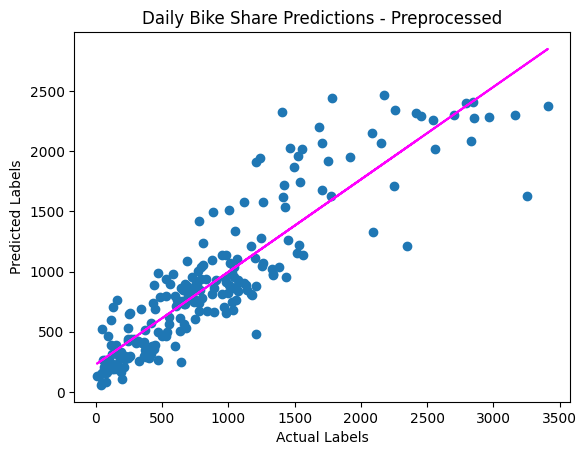

In [60]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()